## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


# 1. Defining the Problem Statement

To summarize the above _Business Understanding_ into a way that helps in defining the problem statement,

It would be highly beneficial to a bank if they know which customer can repay the loan and which customer is likely to default the loan amount. This would help the bank in making the decision to give a loan to that customer or not.

**The problem statement:**
- Predict which customer will default the loan and which customer will not default the loan

**Target Variable:** 
- `loan_status` - Categorical

**Type of problem:** 
- `Supervised Learning` - Target variable is defined

**Task:** 
- `Classification`

**Evaluation Metrics:**
- `Accuracy`

# 2. Cleaning the data

### Loading the data

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Handling Missing values

In [3]:
df.shape

(32581, 12)

In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
#instead of imputing, let's drop the null value rows– for simplicity sake and for accuracy

df = df.dropna()
df = df.reset_index(drop=True)
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
28637,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
df.shape

(28638, 12)

In [7]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Handling Outliers

* **The minimum**: the lowest value excluding outliers (calculated according to the IQR proximity rule)
* **The maximum**: the largest value excluding outliers (calculated according to the IQR proximity rule)
* **The median (Q2)**: the midpoint of the distribution
* **The first quartile (Q1)**: the midpoint of the lower half of the data set
* **The third quartile (Q3)**: the midpoint of the upper half of the data set

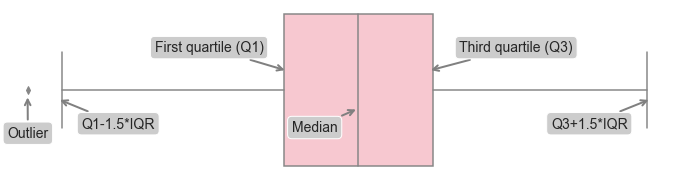

/Users/revanthshahukaru/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


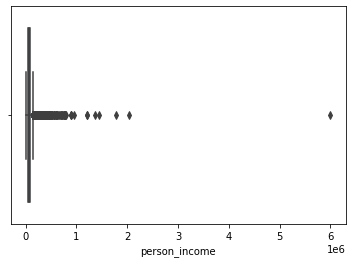

In [8]:
sns.boxplot(df.person_income);

_In this notebook, we're going to find the accuracy **without handling the outliers**_

# 3. Understanding the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
df['cb_person_default_on_file'].value_counts()

N    23535
Y     5103
Name: cb_person_default_on_file, dtype: int64

In [13]:
for x in range(len(df['cb_person_default_on_file'])):
    if df.loc[x, 'cb_person_default_on_file'] == 'N':
        df.loc[x, 'cb_person_default_on_file'] = 0
    else:
        df.loc[x, 'cb_person_default_on_file'] = 1
        
df['cb_person_default_on_file'].value_counts()

0    23535
1     5103
Name: cb_person_default_on_file, dtype: int64

In [14]:
# rearranging the columns to set the target variable as the last column
df = df[['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']]
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,1,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,0,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,0,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,1,4,1


`person_age` Age of the person (20 - 144)

`person_income` income of the person (₹4,000 - ₹60,00,000)

`person_home_ownership` Type of home ownership (Rent/Own/Mortgage/Other)

`person_emp_length` Employment length (in years)

`loan_intent` Purpose of taking the loan (Education/Medical/Personal, etc.)

`loan_grade` 

`loan_amnt` Loan amount

`loan_int_rate` Interest rate on the loan

`loan_percent_income` Percentage of income compared to the loan amount

`cb_person_default_on_file` Historical evidence of default

`cb_person_cred_hist_length` Credit History Length

`loan_status` Loan status (0 is non default 1 is default)

# 4. Identifying the `input` and `output` variables

In [15]:
list(df.columns)[:-1]

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [16]:
X_list = list(df.columns)[:-1]
X_list

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [17]:
y = df['loan_status']

X = df[X_list]

In [18]:
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,0,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,0,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,0,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,0,26


In [19]:
y

0        1
1        0
2        1
3        1
4        1
        ..
28633    0
28634    0
28635    1
28636    0
28637    0
Name: loan_status, Length: 28638, dtype: int64

# 5. Splitting the data for `training` and `testing`

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=111)

#the random_test parameter allows the dataframe to be shuffled in one single way whenever we specify '111' or any other number.

In [21]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22190,28,81996,MORTGAGE,12.0,EDUCATION,B,3000,12.42,0.04,0,5
17092,32,39314,RENT,16.0,DEBTCONSOLIDATION,C,3000,15.23,0.08,0,7
14348,25,58650,MORTGAGE,4.0,MEDICAL,D,20000,14.09,0.29,1,4
1286,23,31500,RENT,7.0,EDUCATION,B,1200,8.88,0.04,0,2
23535,30,28000,OWN,14.0,MEDICAL,B,14400,12.18,0.51,0,5


In [22]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(21478, 11) (21478,)
(7160, 11) (7160,)


# 6. Data preprocessing on X_train

_y\_train need not be preprocessed because it is already in (0,1) fromat_

### Separating Numerical and Categorical columns

In [23]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

**X_train_num**

In [24]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22190,28,81996,12.0,3000,12.42,0.04,5
17092,32,39314,16.0,3000,15.23,0.08,7
14348,25,58650,4.0,20000,14.09,0.29,4
1286,23,31500,7.0,1200,8.88,0.04,2
23535,30,28000,14.0,14400,12.18,0.51,5


**X_train_cat**

In [25]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
22190,MORTGAGE,EDUCATION,B,0
17092,RENT,DEBTCONSOLIDATION,C,0
14348,MORTGAGE,MEDICAL,D,1
1286,RENT,EDUCATION,B,0
23535,OWN,MEDICAL,B,0


### 6.1. Data Preprocessing (Scaling)  X_train_num (Numerical Columns)

Standardization

In [26]:
# This is how the dataframe looks right after scaling

from sklearn.preprocessing import StandardScaler

#Instantiating the class StandardScaler
#Instantiation: creating a copy of a class which inherits all class variables and methods
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num))

X_train_num_rescaled.head()

,0,1,2,3,4,5,6
0,0.047169,0.241165,1.792292,-1.051701,0.426201,-1.218485,-0.197378
1,0.689075,-0.428220,2.784025,-1.051701,1.300047,-0.841796,0.299142
2,-0.434261,-0.124972,-0.191173,1.634595,0.945533,1.135818,-0.445638
3,-0.755214,-0.550768,0.552626,-1.336133,-0.674659,-1.218485,-0.942158
4,0.368122,-0.605659,2.288158,0.749697,0.351566,3.207604,-0.197378


**X_train_num_rescaled**

In [27]:
#the column names and the indexes/indices do not exist anymore as the fit_transform() method outputs an array
#so, obviously, when we try to typecast an array into a dataframe, the columns and indexes won't be present unless we specify them
# so, let's specify the columns and indexes

X_train_num_rescaled.columns = X_train_num.columns
X_train_num_rescaled.index = X_train_num.index
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
22190,0.047169,0.241165,1.792292,-1.051701,0.426201,-1.218485,-0.197378
17092,0.689075,-0.428220,2.784025,-1.051701,1.300047,-0.841796,0.299142
14348,-0.434261,-0.124972,-0.191173,1.634595,0.945533,1.135818,-0.445638
1286,-0.755214,-0.550768,0.552626,-1.336133,-0.674659,-1.218485,-0.942158
23535,0.368122,-0.605659,2.288158,0.749697,0.351566,3.207604,-0.197378


In [28]:
#let's check how the mean and std were before scaling
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,21478.000000,2.147800e+04,21478.000000,21478.000000,21478.000000,21478.000000,21478.000000
mean,27.706071,6.661859e+04,4.771068,9655.604572,11.049480,0.169389,5.795046
std,6.231587,6.376445e+04,4.033439,6328.563487,3.215743,0.106191,4.028128
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.960000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12400.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,38.000000,35000.000000,23.220000,0.830000,30.000000


In [29]:
#observe the mean and std values after scaling
X_train_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04
mean,2.314498e-16,-6.491894e-17,-3.537330e-16,-8.885196e-17,-1.673760e-17,7.526235e-18,-6.110931e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.236643e+00,-9.820526e-01,-1.182906e+00,-1.446745e+00,-1.750641e+00,-1.595173e+00,-9.421584e-01
25%,-7.552138e-01,-4.237348e-01,-6.870397e-01,-7.356666e-01,-9.794170e-01,-7.476242e-01,-6.938983e-01
50%,-2.737844e-01,-1.665322e-01,-1.911734e-01,-2.616144e-01,-1.849706e-02,-1.825916e-01,-4.456383e-01
75%,3.681216e-01,2.098618e-01,5.526262e-01,4.336623e-01,7.558365e-01,5.707851e-01,5.474020e-01
max,1.866244e+01,9.305372e+01,8.238554e+00,4.004856e+00,3.784756e+00,6.221111e+00,6.009124e+00


In [30]:
np.sqrt(np.var(X_train_num_rescaled['person_age']))

0.999999999999931

In [31]:
#trying to show the difference between the mean, std
mean_bs = []
std_bs = []

mean_as = []
std_as = []

for each_column in X_train_num.columns:
    
    mean_bs.append(np.mean(X_train_num[each_column]))
    std_bs.append(np.sqrt(np.var(X_train_num[each_column])))
    
    mean_as.append(np.mean(X_train_num_rescaled[each_column]))
    std_as.append(np.sqrt(np.var(X_train_num_rescaled[each_column])))

In [32]:
#converting to a dataframe

df1 = pd.DataFrame({'Mean before scaling': mean_bs,
                    'Mean after scaling': mean_as,
                   'Standard Deviation before scaling': std_bs,
                   'Standard Deviation after scaling': std_as}, index=X_train_num.columns)
df1

,Mean before scaling,Mean after scaling,Standard Deviation before scaling,Standard Deviation after scaling
person_age,27.706071,2.314498e-16,6.231442,1.0
person_income,66618.588416,-6.491894e-17,63762.966250,1.0
person_emp_length,4.771068,-3.537330e-16,4.033345,1.0
loan_amnt,9655.604572,-8.885196e-17,6328.416159,1.0
loan_int_rate,11.049480,-1.673760e-17,3.215668,1.0
loan_percent_income,0.169389,7.526235e-18,0.106189,1.0
cb_person_cred_hist_length,5.795046,-6.110931e-17,4.028034,1.0


### 6.2. Data Preprocessing X_train_cat

In [33]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
22190,MORTGAGE,EDUCATION,B,0
17092,RENT,DEBTCONSOLIDATION,C,0
14348,MORTGAGE,MEDICAL,D,1
1286,RENT,EDUCATION,B,0
23535,OWN,MEDICAL,B,0


**X_train_cat**

In [34]:
X_train_cat['person_home_ownership'].value_counts()
#nominal

RENT        10886
MORTGAGE     8869
OWN          1654
OTHER          69
Name: person_home_ownership, dtype: int64

In [35]:
X_train_cat['loan_intent'].value_counts()
#nominal

EDUCATION            4278
MEDICAL              3974
VENTURE              3722
PERSONAL             3708
DEBTCONSOLIDATION    3398
HOMEIMPROVEMENT      2398
Name: loan_intent, dtype: int64

In [36]:
X_train_cat['loan_grade'].value_counts()
#ordinal

A    6993
B    6875
C    4337
D    2450
E     635
F     150
G      38
Name: loan_grade, dtype: int64

#### 6.2.1. Applying OHE on nominal categorical columns

`person_home_ownership` and `loan_intent` are the two columns that do not follow any order

In [37]:
X_train_cat[['person_home_ownership', 'loan_intent']]

,person_home_ownership,loan_intent
22190,MORTGAGE,EDUCATION
17092,RENT,DEBTCONSOLIDATION
14348,MORTGAGE,MEDICAL
1286,RENT,EDUCATION
23535,OWN,MEDICAL
...,...,...
7443,RENT,HOMEIMPROVEMENT
4182,RENT,DEBTCONSOLIDATION
4820,OWN,VENTURE
10196,RENT,EDUCATION


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=1500, sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat[['person_home_ownership', 'loan_intent']]),
                              columns = encoder_.get_feature_names_out(X_train_cat[['person_home_ownership', 'loan_intent']].columns),
                              index = X_train_cat[['person_home_ownership', 'loan_intent']].index)

In [39]:
X_train_cat_ohe.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
22190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1286,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23535,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
encoder_.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object)]

In [41]:
encoder_.infrequent_categories_
#the features that are less than min_frequency i.e, 1500

[array(['OTHER'], dtype=object), None]

In [42]:
X_train_cat_ohe.shape

(21478, 8)

#### 6.2.2. Applying Label Encoding on ordinal categorical columns

In [43]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
22190
17092
14348
1286
23535


In [44]:
X_train_cat['loan_grade'].value_counts()

A    6993
B    6875
C    4337
D    2450
E     635
F     150
G      38
Name: loan_grade, dtype: int64

In [45]:
loan_grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x: loan_grade_encoder[x])
X_train_cat_le.head()

,loan_grade
22190,2
17092,3
14348,4
1286,2
23535,2


#### 6.2.3. Concatinating all the categorical features

In [46]:
X_train_cat['cb_person_default_on_file'].to_frame()

,cb_person_default_on_file
22190,0
17092,0
14348,1
1286,0
23535,0
...,...
7443,0
4182,0
4820,1
10196,0


In [47]:
X_train_cat_ohe.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
22190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1286,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23535,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
X_train_cat_le.head()

,loan_grade
22190,2
17092,3
14348,4
1286,2
23535,2


In [49]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
22190,MORTGAGE,EDUCATION,B,0
17092,RENT,DEBTCONSOLIDATION,C,0
14348,MORTGAGE,MEDICAL,D,1
1286,RENT,EDUCATION,B,0
23535,OWN,MEDICAL,B,0


**X_train_cat_encoded**

In [50]:
X_train_cat_encoded = pd.concat([X_train_cat_ohe, X_train_cat_le, X_train_cat['cb_person_default_on_file'].to_frame()], axis=1)
X_train_cat_encoded.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade,cb_person_default_on_file
22190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
17092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
14348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1
1286,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
23535,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0


### X_train_transformed

In [51]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_encoded], axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade,cb_person_default_on_file
22190,0.047169,0.241165,1.792292,-1.051701,0.426201,-1.218485,-0.197378,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
17092,0.689075,-0.428220,2.784025,-1.051701,1.300047,-0.841796,0.299142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
14348,-0.434261,-0.124972,-0.191173,1.634595,0.945533,1.135818,-0.445638,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1
1286,-0.755214,-0.550768,0.552626,-1.336133,-0.674659,-1.218485,-0.942158,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
23535,0.368122,-0.605659,2.288158,0.749697,0.351566,3.207604,-0.197378,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0


# 7. Data preprocessing on X_test

_y\_train need not be preprocessed because it is already in (0,1) fromat_

In [52]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2041,22,30000,RENT,2.0,EDUCATION,A,2500,8.49,0.08,0,2
24032,32,130000,MORTGAGE,0.0,PERSONAL,A,12000,8.59,0.09,0,7
22695,33,90000,MORTGAGE,0.0,HOMEIMPROVEMENT,B,8000,12.53,0.09,0,7
21454,30,72000,MORTGAGE,3.0,MEDICAL,C,9000,14.22,0.13,1,6
10180,26,64000,RENT,0.0,VENTURE,E,10000,16.40,0.16,0,3


In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 2041 to 2912
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7160 non-null   int64  
 1   person_income               7160 non-null   int64  
 2   person_home_ownership       7160 non-null   object 
 3   person_emp_length           7160 non-null   float64
 4   loan_intent                 7160 non-null   object 
 5   loan_grade                  7160 non-null   object 
 6   loan_amnt                   7160 non-null   int64  
 7   loan_int_rate               7160 non-null   float64
 8   loan_percent_income         7160 non-null   float64
 9   cb_person_default_on_file   7160 non-null   object 
 10  cb_person_cred_hist_length  7160 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 671.2+ KB


### Separating Numerical and Categorical columns

**X_test_num**

In [54]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2041,22,30000,2.0,2500,8.49,0.08,2
24032,32,130000,0.0,12000,8.59,0.09,7
22695,33,90000,0.0,8000,12.53,0.09,7
21454,30,72000,3.0,9000,14.22,0.13,6
10180,26,64000,0.0,10000,16.40,0.16,3


**X_test_cat**

In [55]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2041,RENT,EDUCATION,A,0
24032,MORTGAGE,PERSONAL,A,0
22695,MORTGAGE,HOMEIMPROVEMENT,B,0
21454,MORTGAGE,MEDICAL,C,1
10180,RENT,VENTURE,E,0


### 7.1. Scaling X_test_num

Standardization

In [56]:
# This is how the dataframe looks right after scaling

#scaler = StandardScaler()
#should NOT instantiate the encoder_ object as we already did that while scaling the train data

#be extra careful when 
#1. instantiation in the test
#2. calling the scaler.fit_transform() method in test data instead of JUST .transform()

#the test data should NOT be fitted again as it leads to data leakage (relatable to a 'Question Paper Leakage')
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num))

X_test_num_rescaled.head()

,0,1,2,3,4,5,6
0,-0.915690,-0.574292,-0.687040,-1.130710,-0.795940,-0.841796,-0.942158
1,0.689075,0.994016,-1.182906,0.370455,-0.764843,-0.747624,0.299142
2,0.849551,0.366693,-1.182906,-0.261614,0.460408,-0.747624,0.299142
3,0.368122,0.084397,-0.439107,-0.103597,0.985960,-0.370936,0.050882
4,-0.273784,-0.041068,-1.182906,0.054420,1.663890,-0.088420,-0.693898


**X_test_num_rescaled**

In [57]:
#the column names and the indexes/indices do not exist anymore as the fit_transform() method outputs an array
#so, obviously, when we try to typecast an array into a dataframe, the columns and indexes won't be present unless we specify them
# so, let's specify the columns and indexes

X_test_num_rescaled.columns = X_test_num.columns
X_test_num_rescaled.index = X_test_num.index
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2041,-0.915690,-0.574292,-0.687040,-1.130710,-0.795940,-0.841796,-0.942158
24032,0.689075,0.994016,-1.182906,0.370455,-0.764843,-0.747624,0.299142
22695,0.849551,0.366693,-1.182906,-0.261614,0.460408,-0.747624,0.299142
21454,0.368122,0.084397,-0.439107,-0.103597,0.985960,-0.370936,0.050882
10180,-0.273784,-0.041068,-1.182906,0.054420,1.663890,-0.088420,-0.693898


In [58]:
#let's check how the mean and std were before scaling
X_test_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,7160.000000,7.160000e+03,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,27.790642,6.674171e+04,4.841480,9659.158520,11.011028,0.169785,5.789804
std,6.541316,5.793205e+04,4.498499,6333.482874,3.269970,0.107001,4.069666
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.578200e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12743.750000,13.470000,0.230000,8.000000
max,144.000000,2.039784e+06,123.000000,35000.000000,22.060000,0.780000,30.000000


In [59]:
#observe the mean and std values after scaling
X_test_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,0.013572,0.001931,0.017458,0.000562,-0.011958,0.003727,-0.001301
std,1.049728,0.908553,1.115327,1.000801,1.016886,1.007655,1.010336
min,-1.236643,-0.978916,-1.182906,-1.446745,-1.750641,-1.595173,-0.942158
25%,-0.755214,-0.433145,-0.687040,-0.735667,-0.979417,-0.747624,-0.693898
50%,-0.273784,-0.169951,-0.191173,-0.261614,-0.018497,-0.182592,-0.445638
75%,0.368122,0.209862,0.552626,0.487981,0.752727,0.570785,0.547402
max,18.662442,30.945320,29.312874,4.004856,3.424022,5.750250,6.009124


In [60]:
np.sqrt(np.var(X_test_num_rescaled['person_age']))

1.0496542571048821

In [61]:
#trying to show the difference between the mean, std
mean_bs = []
std_bs = []

mean_as = []
std_as = []

for each_column in X_test_num.columns:
    
    mean_bs.append(np.mean(X_test_num[each_column]))
    std_bs.append(np.sqrt(np.var(X_test_num[each_column])))
    
    mean_as.append(np.mean(X_test_num_rescaled[each_column]))
    std_as.append(np.sqrt(np.var(X_test_num_rescaled[each_column])))

In [62]:
#converting to a dataframe

df1 = pd.DataFrame({'Mean before scaling': mean_bs,
                    'Mean after scaling': mean_as,
                   'Standard Deviation before scaling': std_bs,
                   'Standard Deviation after scaling': std_as}, index=X_test_num.columns)
df1

,Mean before scaling,Mean after scaling,Standard Deviation before scaling,Standard Deviation after scaling
person_age,27.790642,0.013572,6.540860,1.049654
person_income,66741.713687,0.001931,57928.004064,0.908490
person_emp_length,4.841480,0.017458,4.498185,1.115249
loan_amnt,9659.158520,0.000562,6333.040576,1.000731
loan_int_rate,11.011028,-0.011958,3.269741,1.016815
loan_percent_income,0.169785,0.003727,0.106994,1.007585
cb_person_cred_hist_length,5.789804,-0.001301,4.069382,1.010265


### 7.2. Data Preprocessing X_test_cat

In [63]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2041,RENT,EDUCATION,A,0
24032,MORTGAGE,PERSONAL,A,0
22695,MORTGAGE,HOMEIMPROVEMENT,B,0
21454,MORTGAGE,MEDICAL,C,1
10180,RENT,VENTURE,E,0


**X_test_cat**

In [64]:
X_test_cat['person_home_ownership'].value_counts()
#nominal

RENT        3665
MORTGAGE    2932
OWN          538
OTHER         25
Name: person_home_ownership, dtype: int64

In [65]:
X_test_cat['loan_intent'].value_counts()
#nominal

EDUCATION            1426
MEDICAL              1319
VENTURE              1279
PERSONAL             1169
DEBTCONSOLIDATION    1167
HOMEIMPROVEMENT       800
Name: loan_intent, dtype: int64

In [66]:
X_test_cat['loan_grade'].value_counts()
#ordinal

A    2409
B    2276
C    1362
D     798
E     235
F      59
G      21
Name: loan_grade, dtype: int64

#### 7.2.1. Applying OHE on nominal categorical columns

`person_home_ownership` and `loan_intent` are the two columns that do not follow any order

In [67]:
X_test_cat[['person_home_ownership', 'loan_intent']]

,person_home_ownership,loan_intent
2041,RENT,EDUCATION
24032,MORTGAGE,PERSONAL
22695,MORTGAGE,HOMEIMPROVEMENT
21454,MORTGAGE,MEDICAL
10180,RENT,VENTURE
...,...,...
3177,RENT,VENTURE
24982,MORTGAGE,DEBTCONSOLIDATION
17441,RENT,MEDICAL
11532,RENT,VENTURE


In [68]:
from sklearn.preprocessing import OneHotEncoder

#should NOT instantiate the encoder_ object again as it was already instantiated while preprocessing the train data
#encoder_ = OneHotEncoder(drop='first', min_frequency=500, sparse=False)

X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat[['person_home_ownership', 'loan_intent']]),
                              columns = encoder_.get_feature_names_out(X_test_cat[['person_home_ownership', 'loan_intent']].columns),
                              index = X_test_cat[['person_home_ownership', 'loan_intent']].index)

In [69]:
X_test_cat_ohe.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
2041,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
24032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22695,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
X_test_cat_ohe.shape

(7160, 8)

#### 7.2.2. Applying Label Encoding on ordinal categorical columns

In [71]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)
X_test_cat_le.head()

""
2041
24032
22695
21454
10180


In [72]:
X_test_cat['loan_grade'].value_counts()

A    2409
B    2276
C    1362
D     798
E     235
F      59
G      21
Name: loan_grade, dtype: int64

In [73]:
loan_grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x: loan_grade_encoder[x])
X_test_cat_le.head()

,loan_grade
2041,1
24032,1
22695,2
21454,3
10180,5


#### 7.2.3. Concatinating all the categorical features

In [74]:
X_test_cat['cb_person_default_on_file'].to_frame()

,cb_person_default_on_file
2041,0
24032,0
22695,0
21454,1
10180,0
...,...
3177,0
24982,1
17441,0
11532,0


In [75]:
X_test_cat_ohe.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
2041,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
24032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22695,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
X_test_cat_le.head()

,loan_grade
2041,1
24032,1
22695,2
21454,3
10180,5


In [77]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2041,RENT,EDUCATION,A,0
24032,MORTGAGE,PERSONAL,A,0
22695,MORTGAGE,HOMEIMPROVEMENT,B,0
21454,MORTGAGE,MEDICAL,C,1
10180,RENT,VENTURE,E,0


**X_test_cat_encoded**

In [78]:
X_test_cat_encoded = pd.concat([X_test_cat_ohe, X_test_cat_le, X_test_cat['cb_person_default_on_file'].to_frame()], axis=1)
X_test_cat_encoded.head()

,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade,cb_person_default_on_file
2041,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
24032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
22695,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
21454,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1
10180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0


### X_test_transformed

In [79]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_encoded], axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade,cb_person_default_on_file
2041,-0.915690,-0.574292,-0.687040,-1.130710,-0.795940,-0.841796,-0.942158,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
24032,0.689075,0.994016,-1.182906,0.370455,-0.764843,-0.747624,0.299142,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
22695,0.849551,0.366693,-1.182906,-0.261614,0.460408,-0.747624,0.299142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
21454,0.368122,0.084397,-0.439107,-0.103597,0.985960,-0.370936,0.050882,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,1
10180,-0.273784,-0.041068,-1.182906,0.054420,1.663890,-0.088420,-0.693898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,0


# 8. Model-building & 9. Evaluation Metrics

### 8.1. KNN Classification

In [80]:
import time
start = time.process_time()

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

time_taken_knn = time.process_time() - start

print(f'Time taken: {time_taken_knn}s') # to measure time

Time taken: 0.0739749999999999s


In [81]:
y_test_pred = classifier.predict(X_test_transformed)

In [82]:
pd.DataFrame({'Actual': y_test,
              'Predicted': y_test_pred}).head()

,Actual,Predicted
2041,1,0
24032,0,0
22695,0,0
21454,0,0
10180,1,1


In [83]:
list1 = [list(y_test_pred).count(0),list(y_test_pred).count(1)]
list1

[5977, 1183]

In [84]:
compare_df = y_test.value_counts().to_frame()
compare_df

,loan_status
0,5548
1,1612


In [85]:
compare_df['Predicted'] = list1
compare_df.columns = ['Actual', 'Predicted']
compare_df

,Actual,Predicted
0,5548,5977
1,1612,1183


In [86]:
import warnings
warnings.filterwarnings("ignore")

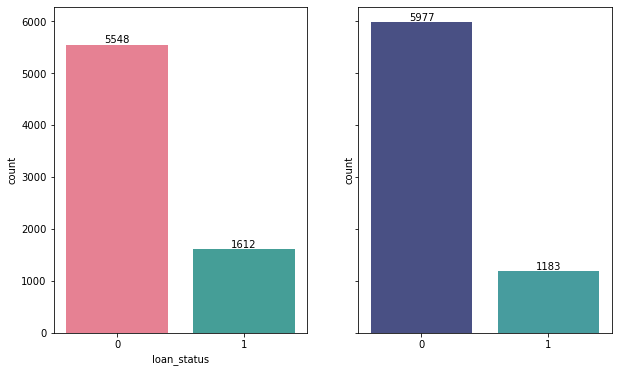

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey = True)

ax = sns.countplot(y_test, palette="husl", ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

ax = sns.countplot(y_test_pred, palette="mako", ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

### 9.1. Evaluation Metrics for KNN Classification

In [88]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy of the classifier is: 88.84%


In [89]:
accuracy_knn = round(accuracy_score(y_test, y_test_pred) * 100, 2)

### 8.2. Logistic Regression

In [90]:
import time
start = time.process_time()

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

time_taken_logistic = time.process_time() - start

print(f'Time taken: {time_taken_logistic}s') # to measure time

Time taken: 0.3357739999999998s


In [91]:
y_test_pred = classifier.predict(X_test_transformed)

In [92]:
pd.DataFrame({'Actual': y_test,
              'Predicted': y_test_pred}).head()

,Actual,Predicted
2041,1,0
24032,0,0
22695,0,0
21454,0,0
10180,1,1


In [93]:
list1 = [list(y_test_pred).count(0),list(y_test_pred).count(1)]
list1

[6101, 1059]

In [94]:
compare_df['Predicted'] = list1
compare_df.columns = ['Actual', 'Predicted']
compare_df

,Actual,Predicted
0,5548,6101
1,1612,1059


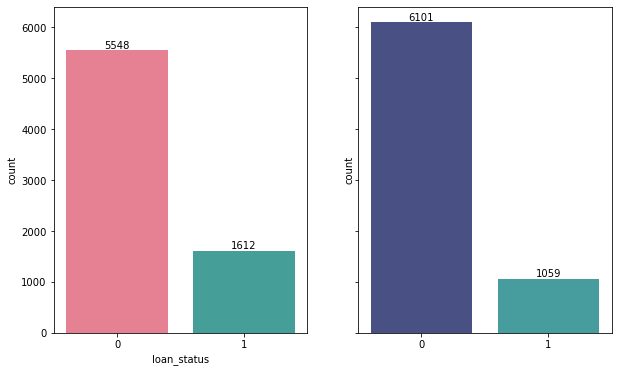

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey = True)

ax = sns.countplot(y_test, palette="husl", ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

ax = sns.countplot(y_test_pred, palette="mako", ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

### 9.2. Evaluation Metrics for Logistic Regression

In [96]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy of the classifier is: 84.9%


In [97]:
accuracy_logistic = round(accuracy_score(y_test, y_test_pred) * 100, 2)

### 8.3. Decision Tree

In [98]:
import time
start = time.process_time()

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

time_taken_dt = time.process_time() - start

print(f'Time taken: {time_taken_dt}s') # to measure time

Time taken: 0.30099300000000007s


In [99]:
y_test_pred = classifier.predict(X_test_transformed)

In [100]:
pd.DataFrame({'Actual': y_test,
              'Predicted': y_test_pred}).head()

,Actual,Predicted
2041,1,0
24032,0,0
22695,0,1
21454,0,0
10180,1,1


In [101]:
list1 = [list(y_test_pred).count(0),list(y_test_pred).count(1)]
list1

[5528, 1632]

In [102]:
compare_df['Predicted'] = list1
compare_df.columns = ['Actual', 'Predicted']
compare_df

,Actual,Predicted
0,5548,5528
1,1612,1632


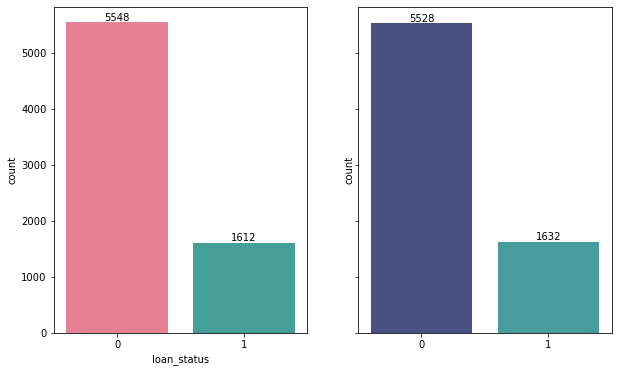

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey = True)

ax = sns.countplot(y_test, palette="husl", ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

ax = sns.countplot(y_test_pred, palette="mako", ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

### 9.3. Evaluation Metrics for Decision Tree

In [104]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy of the classifier is: 88.88%


In [105]:
accuracy_dt = round(accuracy_score(y_test, y_test_pred) * 100, 2)

### 8.4. Random Forest

In [106]:
import time
start = time.process_time()

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

time_taken_rf = time.process_time() - start

print(f'Time taken: {time_taken_rf}s') # to measure time

Time taken: 1.661435s


In [107]:
y_test_pred = classifier.predict(X_test_transformed)

In [108]:
pd.DataFrame({'Actual': y_test,
              'Predicted': y_test_pred}).head()

,Actual,Predicted
2041,1,0
24032,0,0
22695,0,0
21454,0,0
10180,1,1


In [109]:
list1 = [list(y_test_pred).count(0),list(y_test_pred).count(1)]
list1

[5976, 1184]

In [110]:
compare_df['Predicted'] = list1
compare_df.columns = ['Actual', 'Predicted']
compare_df

,Actual,Predicted
0,5548,5976
1,1612,1184


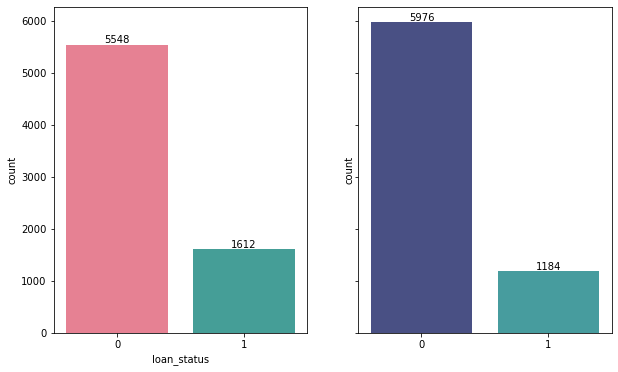

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey = True)

ax = sns.countplot(y_test, palette="husl", ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

ax = sns.countplot(y_test_pred, palette="mako", ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

for i in ax.containers:
    ax.bar_label(i,)

### 9.4. Evaluation Metrics for Random Forest

In [112]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%")

Accuracy of the classifier is: 92.99%


In [113]:
accuracy_rf = round(accuracy_score(y_test, y_test_pred) * 100, 2)

In [114]:
algorithms = ['KNN Classification', 'Logistic Regression', 'Decision Tree Classification', 'Random Forest Classification']

In [115]:
accuracies = [accuracy_knn, accuracy_logistic, accuracy_dt, accuracy_rf]

In [116]:
time_taken = [time_taken_knn, time_taken_logistic, time_taken_dt, time_taken_rf]

In [117]:
eval_table = pd.DataFrame({'Accuracy': accuracies,
                          'Time Taken': time_taken},
                         index=algorithms)
eval_table

,Accuracy,Time Taken
KNN Classification,88.84,0.073975
Logistic Regression,84.90,0.335774
Decision Tree Classification,88.88,0.300993
Random Forest Classification,92.99,1.661435


# Conclusion

As seen in the above dataframe,

Although it took more time compared to the other models,
**Random Forest Classification model** scored the highest accuracy of **92.99%**
 
Banks can use this model to input new data and predict the customers who are likely to default the loan.





_Foot notes: This model is built without handling the outliers and without hyperparameter tuning. We can definitely improve the performance and ultimately expect better accuracy numbers with hyperparameter tuning and other techniques._